In this study, I try to explore and visualize "Significant Earthquakes, 1965-2016" dataset. Additionally, there are basic analysis about parameters. The graphs are:
* Bar Plot (Frequency of Earthquakes by Year
* Bubble Chart
* Mixed Line Plot (Maximum and Average Magnitude of Each Year)
* 3D Scatter Plot
* Animation Map

In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir(""))

# Any results you write to the current directory are saved as output.

First of all, we import the dataset and append a new column for year by "Date" column.

In [13]:
data=pd.read_csv("databasetoba.csv")
#data=data.drop([3378, 7512, 20650])
data["Month"]=[int(each.split("/")[0]) for each in data.iloc[:,0]]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        144 non-null    object 
 1   Time                        60 non-null     object 
 2   Latitude                    144 non-null    float64
 3   Longitude                   144 non-null    float64
 4   Type                        144 non-null    object 
 5   Depth                       144 non-null    int64  
 6   Depth Error                 0 non-null      float64
 7   Depth Seismic Stations      0 non-null      float64
 8   Magnitude                   144 non-null    float64
 9   Magnitude Type              144 non-null    object 
 10  Magnitude Error             0 non-null      float64
 11  Magnitude Seismic Stations  0 non-null      float64
 12  Azimuthal Gap               0 non-null      float64
 13  Horizontal Distance         0 non-n

In [15]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month
0,1/23/21,22:29:38,2.50,99.25,Earthquake,5,NaN,NaN,2.7,MW,...,NaN,NaN,NaN,NaN,BMKG,BMKG,IA,IA,Automatic,1
1,2/17/21,19:01:17,2.73,98.82,Earthquake,3,NaN,NaN,2.8,MW,...,NaN,NaN,NaN,NaN,BMKG,BMKG,IA,IA,Automatic,2
2,2/17/21,19:02:35,2.71,98.83,Earthquake,2,NaN,NaN,3.3,MW,...,NaN,NaN,NaN,NaN,BMKG,BMKG,IA,IA,Automatic,2
3,2/18/21,13:26:10,2.37,98.88,Earthquake,3,NaN,NaN,2.0,MW,...,NaN,NaN,NaN,NaN,BMKG,BMKG,IA,IA,Automatic,2
4,2/19/21,13:51:04,2.62,98.85,Earthquake,15,NaN,NaN,2.0,MW,...,NaN,NaN,NaN,NaN,BMKG,BMKG,IA,IA,Automatic,2


**- BAR PLOT:**

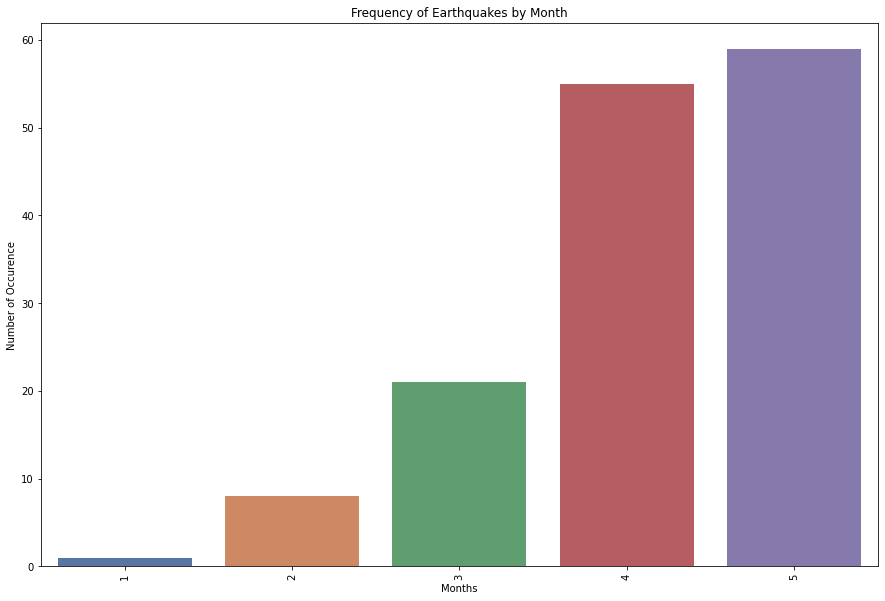

In [16]:
# prepare data frame
month_list=list(data['Month'].unique())
MonthType=[]
    
for i in month_list:
    val=data[data['Month']==i]
    MonthType.append(len(val))
            
dfType=pd.DataFrame({'month_list':month_list, 'Count_Type':MonthType})
new_index=(dfType['month_list'].sort_values(ascending=True)).index.values
sorted_data=dfType.reindex(new_index)

# bar plot visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['month_list'], y=sorted_data['Count_Type'], palette="deep")
plt.xticks(rotation=90)
plt.xlabel("Months")
plt.ylabel("Number of Occurence")
plt.title("Frequency of Earthquakes by Month")
plt.show()

In this plot, we can see the count of earthquakes for each year. Between 1965-2016, ***1965*** was the most calm year about earthquakes. ***2011*** is the year that has the highest number of earthquakes.

****- BUBBLE CHART:****

In [17]:
# prepare data frame
magnitude=[]
for i in sorted_data.month_list:
    x=data[data['Month']==i]
    data_magnitude=sum(x.Magnitude)/len(x.Magnitude)
    magnitude.append(data_magnitude)
sorted_data["Magnitude"]=magnitude

depth=[]
for i in sorted_data.month_list:
    x=data[data['Month']==i]
    data_depth=sum(x.Depth)/len(x.Depth)
    depth.append(data_depth)
sorted_data["Depth"]=depth


In [18]:
# bubble chart visualization
bubble_color=[each for each in sorted_data.Count_Type]
bubble=[
    {
        'y': sorted_data.Magnitude,
        'x': sorted_data.Depth,
        'mode':'markers',
        'marker':{
            'color':bubble_color,
            'size': sorted_data['Count_Type'],
            'sizemode':'area',
            'sizeref': (2.*max(sorted_data['Count_Type'])/(40.**2)),
            'showscale': True},
        'text':sorted_data.month_list
    }
]

layout=go.Layout(
xaxis=dict(title='Average Depth of Each Month'),
yaxis=dict(title='Average Magnitude of Each Month'))
fig=go.Figure(data=bubble, layout=layout)
iplot(fig)

At the bubble chart, we can see the average depth and magnitude of each year. Also, size and color of bubbles show the count of eathquake of the year. Generally, most of earthquakes occured in 55-80 Depth range and 5.8-5.95 Magnitude range.

**- MIXED LINE PLOT:**

In [19]:
# prepare data frame
max_magnitude = list(data.groupby("Month").Magnitude.max())
sorted_data["Max_Magnitude"]=max_magnitude

# visualization
trace0=go.Scatter(
        x=sorted_data.month_list,
        y=sorted_data.Max_Magnitude,
        mode='lines',
        name='Max Magnitude')

trace1=go.Scatter(
        x=sorted_data.month_list,
        y=sorted_data.Magnitude,
        mode='lines + markers',
        name='Avg Magnitude')

layout = dict(title = 'Maximum and Average Magnitude of Each Month',
              xaxis= dict(title= 'Month',ticklen= 5))

line_data=[trace0, trace1]
fig=go.Figure(data=line_data, layout=layout)
iplot(fig)    

When we examine "Avg Magnitude" line, we can see average magnitude is approximately between 5.8-6. Also, avg magnitude value fell below 6.0 after 1970. In addition, maximum magnitude values are 9.1 and they seem in 2004 and 2011.

**- 3D SCATTER PLOT:**

In [20]:
trace0=go.Scatter3d(
    x=sorted_data.month_list,
    #x=data.month_list,
    y=sorted_data.Magnitude,
    #y=data.Magnitude,
    z=sorted_data.Depth,
    #z=data.Depth,
    mode='markers',
    marker=dict(
        size=10,
        color=sorted_data.Max_Magnitude,
        colorscale='Earth',
        showscale=True,))

scatter_plot = [trace0]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene=dict(
    xaxis=dict(title='Month'),
    yaxis=dict( title='Magnitude'),
    zaxis=dict( title='Depth'),),)
fig = go.Figure(data=scatter_plot, layout=layout)
iplot(fig)
        
    

In this plot, we can see the markers on average magnitude, average depth and year axis. Also, color range represents the maximum magnitude values of each year.

**- ANIMATION MAP:**

In [21]:
months = [str(each) for each in list(data.Month.unique())]

figure={
    'data':[],
    'layout':{},
    'frames':[]
    
}

figure['layout']['geo']=dict(showframe=False, showland=True, showcoastlines=True, 
                             showcountries=True, countrywidth=0.8, landcolor='rgb(157,255,125)', subunitwidth=1,
                            showlakes=True, lakecolor='rgb(211,255,255)', countrycolor='rgb(209,209,209)')
figure['layout']['hovermode']='closest'
figure['layout']['sliders']={
    'args':[
        'transition',{
            'duration':700,
            'easing':'cubic-in-out'}
    ],
    'initialValue':'1965',
    'plotlycommand':'animate',
    'values':months,
    'visible': True
}
figure['layout']['updatemenus']=[
    {
        'buttons': [{'args':[None,{'frame':{'duration':500, 'redraw':False}, 'fromcurrent':True, 
                                   'transition':{'duration':300, 'easing':'quadratic-in-out'}}],
                    'label':'Play',
                    'method':'animate'},
                    {'args':[[None],{'frame':{'duration':0, 'redraw':False}, 'mode':'immediate',
                                    'transition':{'duration':0}}],
                     'label':'Pause',
                     'method':'animate'
                    }    
        ],
        'direction':'left',
        'pad':{'r':10, 't':87},
        'showactive':False,
        'type':'buttons',
        'x':0.1,
        'xanchor':'right',
        'y':0,
        'yanchor':'top',
        
    }
]
sliders_dict={
    'active':0,
    'yanchor':'top',
    'xanchor':'left',
    'currentvalue':{
        'font':{'size':20},
        'prefix':'Month:',
        'visible':True,
        'xanchor':'right'
    },
    'transition':{'duration':300, 'easing':'cubic-in-out'},
    'pad':{'b':10, 't':50},
    'len':0.9,
    'x':0.1,
    'y':0,
    'steps':[]
}

types = ['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst']
custom_colors = {
    'Earthquake': 'rgb(94, 0, 0)',
    'Nuclear Explosion': 'rgb(0, 11, 84)',
    'Explosion': 'rgb(99, 110, 250)',
    'Rock Burst': 'rgb(27, 27, 27)'
}
month = 2021
for ty in types:
    dataset_by_month = data[data['Month'] == month]
    dataset_by_month_and_cont = dataset_by_month[dataset_by_month['Type'] == ty]
    
    data_dict = dict(
    type='scattergeo',
    lon = data['Longitude'],
    lat = data['Latitude'],
    hoverinfo = 'text',
    text = ty,
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = custom_colors[ty],
        opacity = 0.7),
)
    figure['data'].append(data_dict)
    
for month in months:
    frame = {'data': [], 'name': str(month)}
    for ty in types:
        dataset_by_month = data[data['Month'] == int(month)]
        dataset_by_month_and_cont = dataset_by_month[dataset_by_month['Type'] == ty]

        data_dict = dict(
                type='scattergeo',
                lon = dataset_by_month_and_cont['Longitude'],
                lat = dataset_by_month_and_cont['Latitude'],
                hoverinfo = 'text',
                text = ty,
                mode = 'markers',
                marker=dict(
                    sizemode = 'area',
                    sizeref = 1,
                    size= 10 ,
                    line = dict(width=1,color = "white"),
                    color = custom_colors[ty],
                    opacity = 0.7),
                name = ty
            )
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [month],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': month,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)


figure["layout"]["autosize"]= True
figure["layout"]["title"] = "EARTHQUAKE"       

figure['layout']['sliders'] = [sliders_dict]

iplot(figure)
